In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from matplotlib.pyplot import legend

warnings.filterwarnings('ignore')

loading the dataset


In [108]:
df = pd.read_csv("E:/python hotel booking project/hotel_bookings 2.csv")

In [109]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,3/7/2015
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,3/7/2015
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,6/5/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,22/4/2015


In [110]:
df.shape

(119390, 32)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [149]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [148]:
df['reservation_status_date'] =pd.to_datetime(df['reservation_status_date'])

In [147]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118897 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118897 non-null  object 
 1   is_canceled                     118897 non-null  int64  
 2   lead_time                       118897 non-null  int64  
 3   arrival_date_year               118897 non-null  int64  
 4   arrival_date_month              118897 non-null  object 
 5   arrival_date_week_number        118897 non-null  int64  
 6   arrival_date_day_of_month       118897 non-null  int64  
 7   stays_in_weekend_nights         118897 non-null  int64  
 8   stays_in_week_nights            118897 non-null  int64  
 9   adults                          118897 non-null  int64  
 10  children                        118897 non-null  float64
 11  babies                          118897 non-null  int64  
 12  meal                 

In [145]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,118897,118897,118897,118897,118897,118897,118897,118897,118897,118897,118897,118897
unique,2,12,5,177,7,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,21/10/2015
freq,79301,13852,91862,48585,56402,97729,85600,73862,104163,89173,74745,1461


In [144]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('_'*50)

hotel
['Resort Hotel' 'City Hotel']
__________________________________________________
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
__________________________________________________
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
__________________________________________________
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 

In [143]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [142]:
df.drop(['company','agent'],axis=1,inplace=True)
df.dropna(inplace=True)

In [141]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [140]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119385.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,103049.000000,6797.000000,119389.000000,119389.000000,119389.000000,119389.000000
mean,0.370411,104.011994,2016.156555,27.165292,15.798164,0.927606,2.500314,1.856402,0.103891,0.007949,0.031912,0.087119,0.137098,0.221118,86.694107,189.266735,2.321169,101.786744,0.062518,0.571368
std,0.482917,106.863358,0.707479,13.605134,8.780826,0.998614,1.908289,0.579263,0.398563,0.097437,0.175768,0.844340,1.497443,0.652304,110.774841,131.655015,17.594793,48.153554,0.245292,0.792800
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.560000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,510.000000,8.000000,5.000000


In [139]:
df= df[df['adr']<5000]

In [138]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


data analysis and visualization


is_canceled
0    0.629584
1    0.370416
Name: proportion, dtype: float64


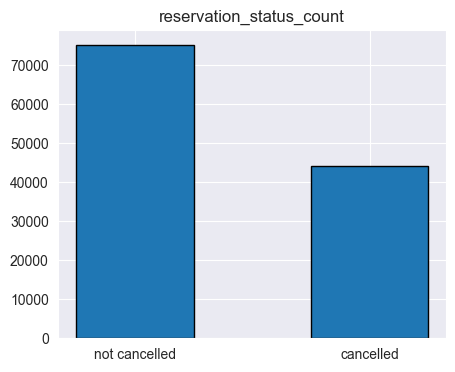

In [137]:
cancelled_perc = df['is_canceled'].value_counts(normalize =True)
print(cancelled_perc)
plt.figure(figsize=(5,4))
plt.title('reservation_status_count')
plt.bar(['not cancelled','cancelled'],df['is_canceled'].value_counts(),edgecolor='k',width=0.5)
plt.show()

is_canceled
0    0.629584
1    0.370416
Name: proportion, dtype: float64


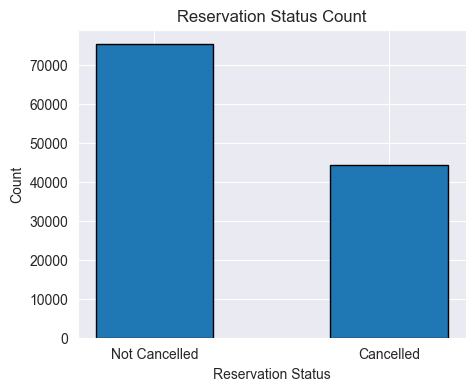

In [136]:
cancelled_perc = df['is_canceled'].value_counts(normalize=True)
print(cancelled_perc)
plt.figure(figsize=(5, 4))
plt.title('Reservation Status Count')
plt.bar(['Not Cancelled', 'Cancelled'], df['is_canceled'].value_counts(), edgecolor='k', width=0.5)
plt.xlabel('Reservation Status')
plt.ylabel('Count')
plt.show()

is_canceled
0    0.629584
1    0.370416
Name: proportion, dtype: float64


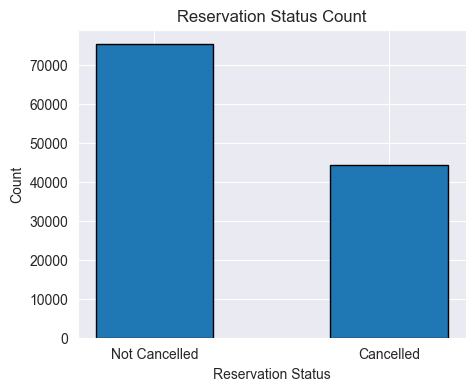

In [135]:
cancelled_perc = df['is_canceled'].value_counts(normalize=True)
print(cancelled_perc)
plt.figure(figsize=(5, 4))
plt.title('Reservation Status Count')
plt.bar(['Not Cancelled', 'Cancelled'], df['is_canceled'].value_counts(), edgecolor='k', width=0.5)
plt.xlabel('Reservation Status')
plt.ylabel('Count')
plt.show()

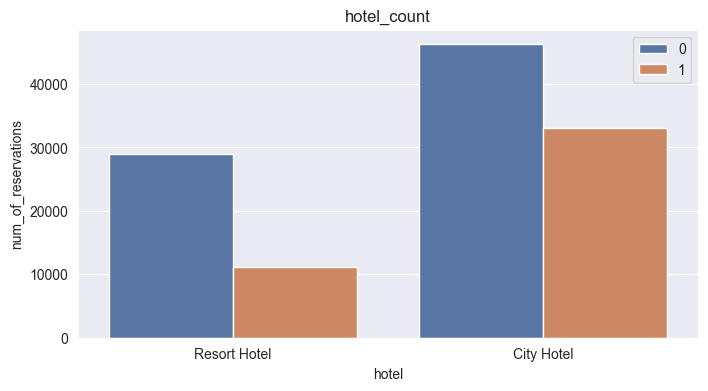

In [134]:
plt.figure(figsize=(8, 4))
ax1 = sns.countplot(x='hotel', data=df, hue='is_canceled', palette='deep')
legend_handles, legend_labels = ax1.get_legend_handles_labels()
plt.title('hotel_count')
plt.xlabel('hotel')
plt.ylabel('num_of_reservations')
plt.legend(legend_handles, legend_labels)
plt.show()

In [133]:
resort_hotel = df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)


is_canceled
0    0.722366
1    0.277634
Name: proportion, dtype: float64

In [132]:
city_hotel = df[df['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.58273
1    0.41727
Name: proportion, dtype: float64

In [56]:
resort_hotel=resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel=city_hotel.groupby('reservation_status_date')[['adr']].mean()

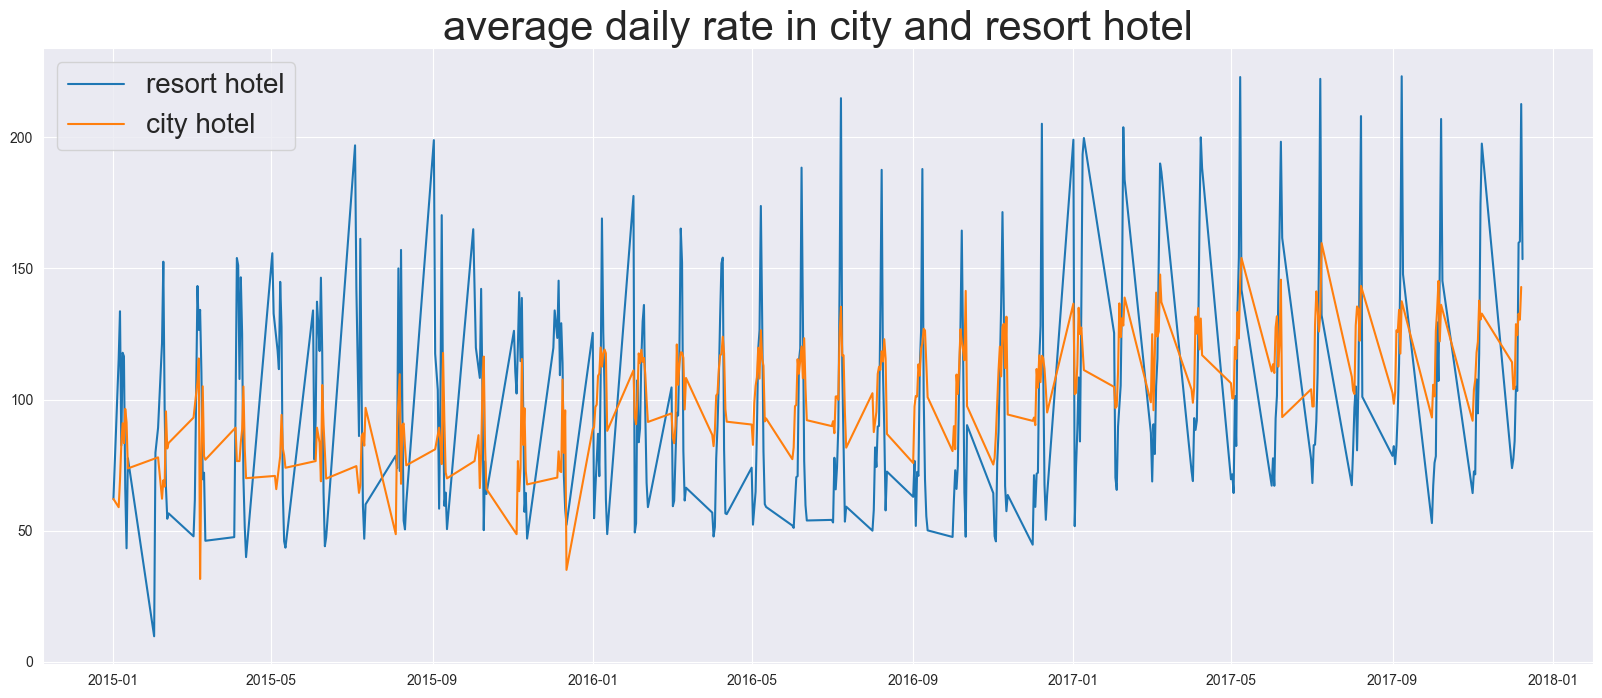

In [130]:
plt.figure(figsize=(20,8))
plt.title('average daily rate in city and resort hotel',fontsize=30)
plt.plot(resort_hotel.index,resort_hotel['adr'],label='resort hotel')
plt.plot(city_hotel.index,city_hotel['adr'],label='city hotel')

plt.legend(fontsize=20)
plt.show()



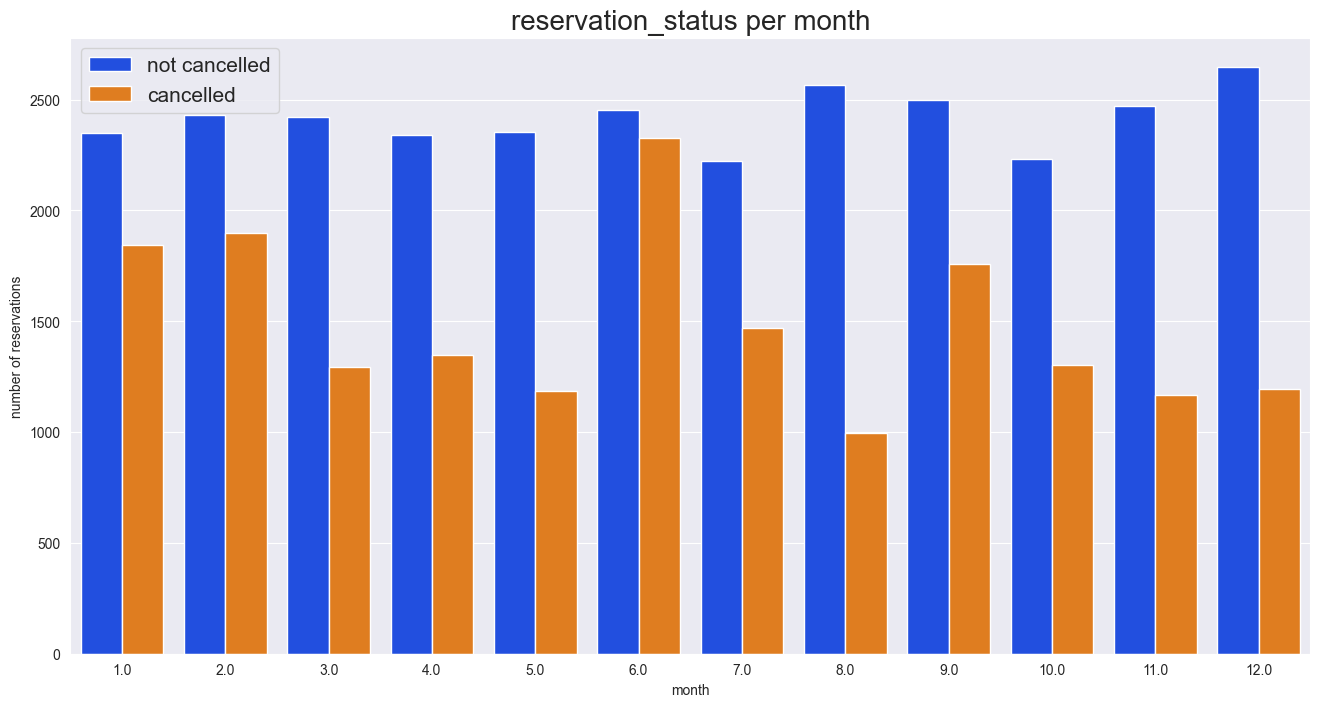

In [150]:
df['month'] = df['reservation_status_date'].dt.month
(plt.figure(figsize=(16,8)))
ax1=sns.countplot(x='month',data=df,hue='is_canceled',palette='bright')
legend_lables,_=ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('reservation_status per month',size=20)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.legend(['not cancelled','cancelled'],fontsize=15)
plt.show()

TypeError: barplot() got multiple values for argument 'data'

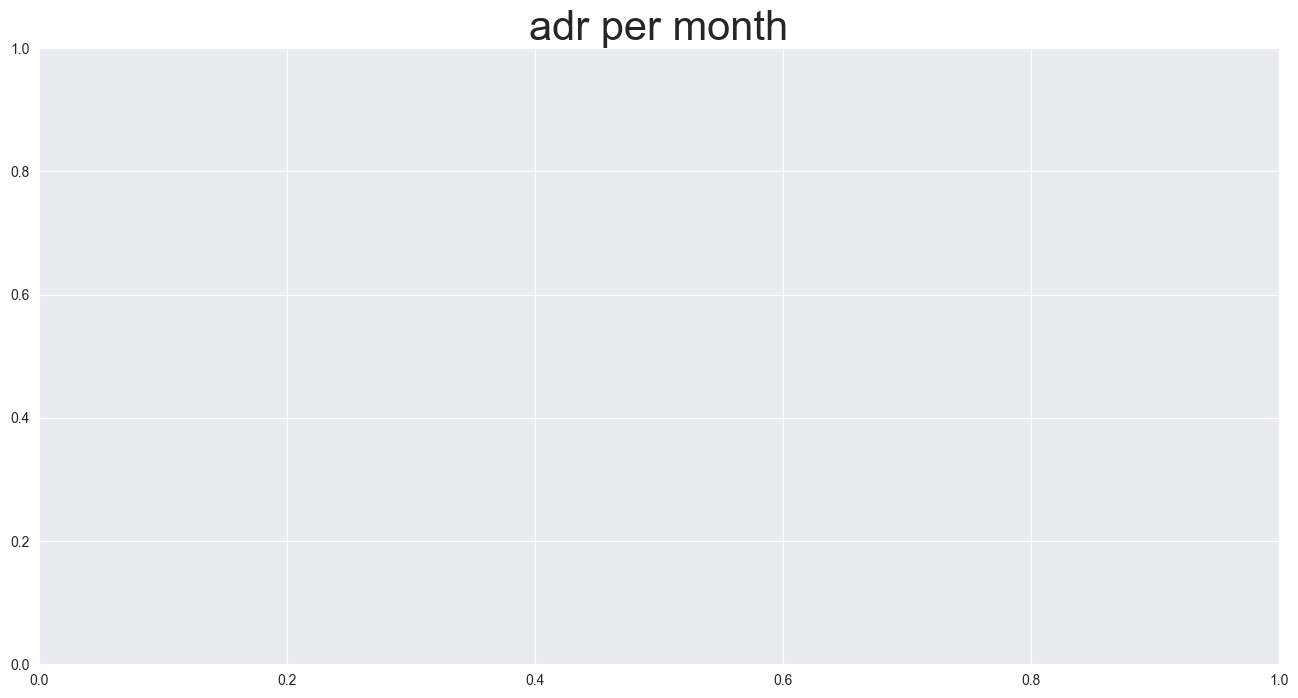

In [153]:
plt.figure(figsize=(16,8))
plt.title('adr per month',fontsize=30)
sns.barplot('month','adr',data=df[df['is_canceled']==1].groupby('month')[['adr']].sum().reset_index())
plt.show()

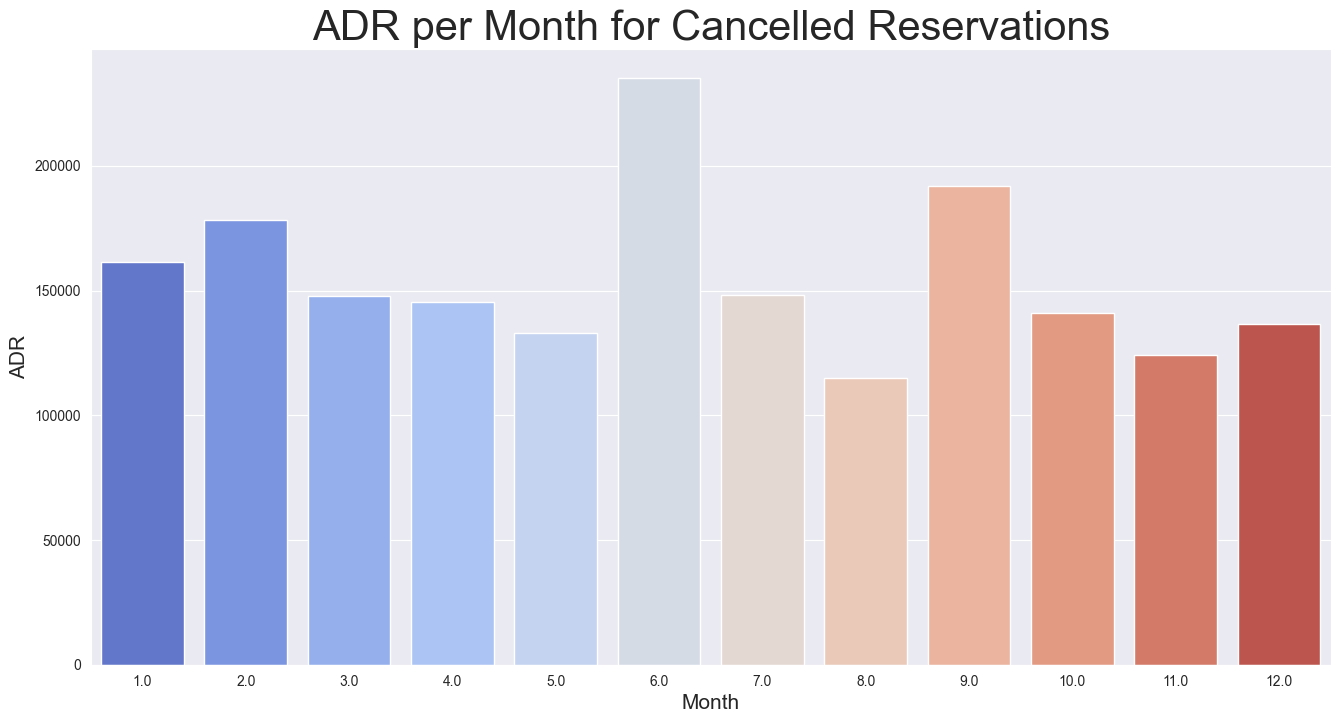

In [152]:
plt.figure(figsize=(16,8))
plt.title('ADR per Month for Cancelled Reservations', fontsize=30)
sns.barplot(x='month', y='adr', data=df[df['is_canceled']==1].groupby('month')[['adr']].sum().reset_index(), palette='coolwarm')
plt.xlabel('Month', fontsize=15)
plt.ylabel('ADR', fontsize=15)
plt.show()



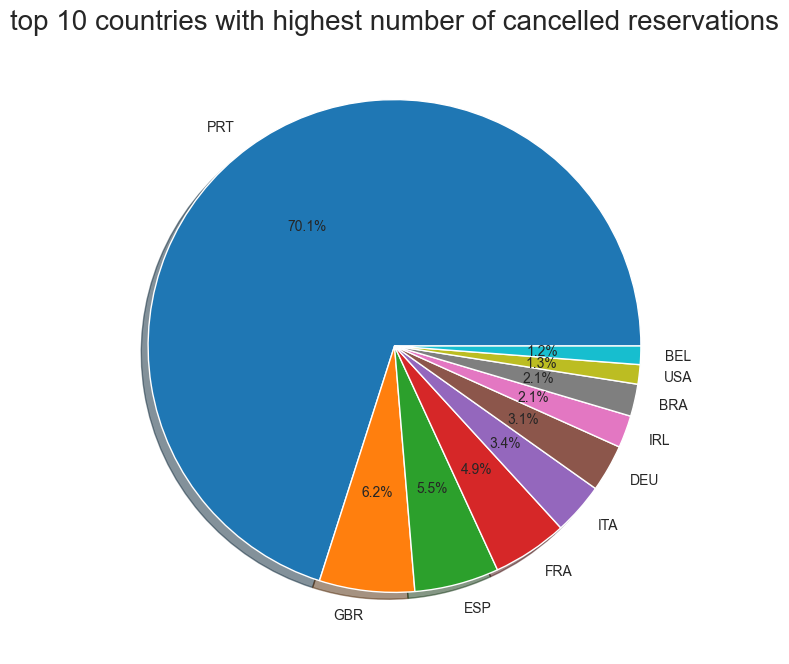

In [122]:
cancelled_data = df[df['is_canceled']==1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize=(8,8))
plt.title('top 10 countries with highest number of cancelled reservations',fontsize=20)
plt.pie(top_10_country,labels=top_10_country.index,autopct='%1.1f%%',shadow=True)
plt.show()

In [123]:
df['market_segment'].value_counts()

market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

In [124]:
df['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.473046
Offline TA/TO    0.202856
Groups           0.165935
Direct           0.105587
Corporate        0.044350
Complementary    0.006223
Aviation         0.001985
Undefined        0.000017
Name: proportion, dtype: float64

In [125]:
cancelled_data['market_segment'].value_counts(normalize=True)


market_segment
Online TA        0.468954
Groups           0.273539
Offline TA/TO    0.187930
Direct           0.043732
Corporate        0.022431
Complementary    0.002193
Aviation         0.001176
Undefined        0.000045
Name: proportion, dtype: float64

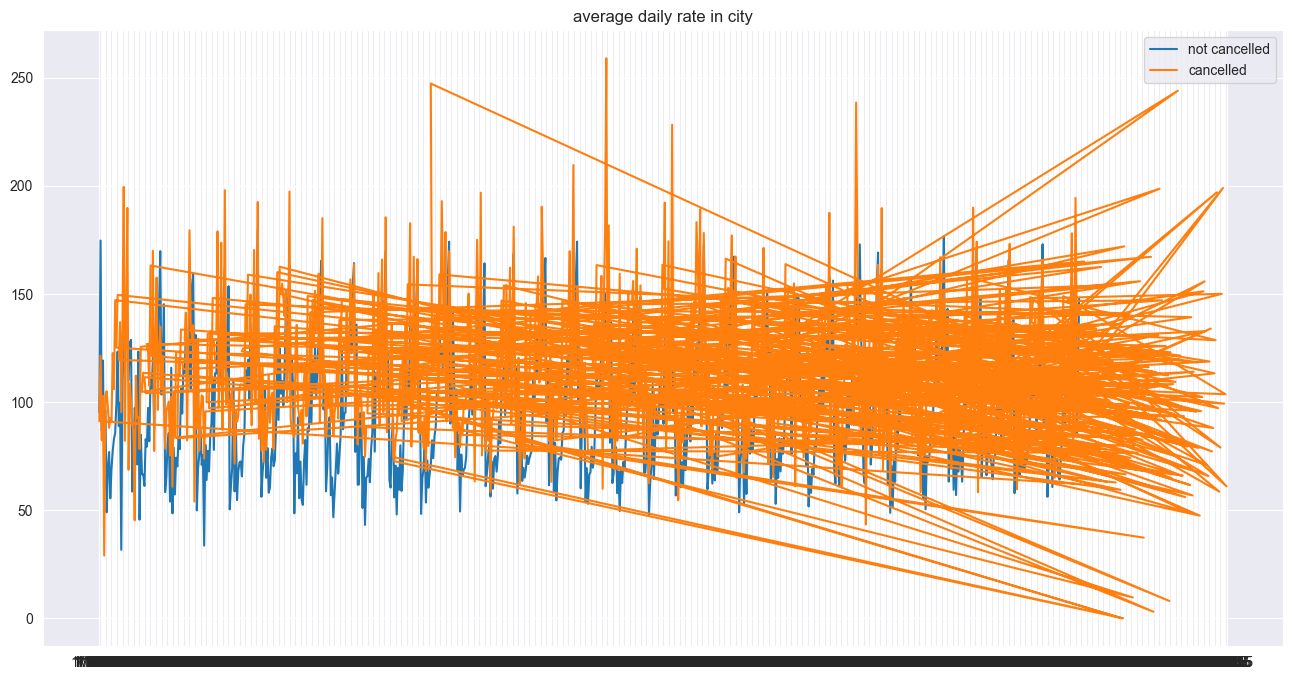

In [126]:
 canceled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
 canceled_df_adr.reset_index(inplace=True)
 canceled_df_adr.sort_values('reservation_status_date',inplace=True)

not_cancelled_data = df[df['is_canceled']==0]
 not_cancelled_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
 not_cancelled_adr.reset_index(inplace=True)
 not_cancelled_adr.sort_values('reservation_status_date',inplace=True)

 plt.figure(figsize=(16,8))
 plt.title('average daily rate in city')
 plt.plot(not_cancelled_adr['reservation_status_date'],not_cancelled_adr['adr'],label='not cancelled')
 plt.plot(canceled_df_adr['reservation_status_date'],canceled_df_adr['adr'],label='cancelled')
 plt.legend()
 plt.show()


In [115]:
canceled_df_adr = canceled_df_adr[(canceled_df_adr['reservation_status_date'] > '2016-01-01') & (canceled_df_adr['reservation_status_date'] < '2017-09-01')]
not_cancelled_adr = not_cancelled_adr[(not_cancelled_adr['reservation_status_date'] > '2016-01-01') & (not_cancelled_adr['reservation_status_date'] < '2017-09-01')]